In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/home/efarr/Documents/GitHub/metalinks/Tests/Figures')
from aux import *
import matplotlib.gridspec as gridspec

In [7]:
DB = pd.read_csv('/Users/ef6/Documents/GitHub/metalinks_analysis/metalinksDB/DB_F_14042024_test.csv')
DB['connection'] = DB['HMDB'] + '_' + DB['Symbol']
len(DB['connection'].unique())



10158

In [16]:
cpdb = pd.read_excel('/Users/ef6/Documents/GitHub/metalinks/data/Cellphone_suptab4_curated.xlsx')
cpdb['symbol'] = cpdb['protein_name_b'].str.split('_').str[0]
cpdb['partner_a'].str.split('_').str[0][229:].unique()

array(['Adenosine', 'Adrenaline', 'Acetylcholine', 'GABA', 'Glutamate',
       'Glycine', 'LeukotrieneE4', 'LTD4', 'LTC4', 'Noradrenaline',
       'ProstaglandinD2', 'PGD2', '5-HT', 'b-PEA', 'Dopamine'],
      dtype=object)

In [3]:
metalinks_data = load_prepro_metalinks(MR_path='/Users/ef6/Documents/GitHub/metalinks_analysis/metalinksDB/DB_F_0.4.1.csv')
PD = metalinks_data[0]
MR = metalinks_data[1]
anno = metalinks_data[2]
data = load_prepro_other_dbs(MR, PD)
PD_metabolites = data[0]
MR_metabolites = data[1]
MR_proteins = data[2]
MR_interactions = data[3]

                location  percentages
0          Extracellular   100.000000
1               Membrane    56.537823
4              Cytoplasm    49.539484
5  Endoplasmic reticulum    19.537974
7           Mitochondria    18.012985
6               Lysosome    11.595953
3             Peroxisome    11.520459
2        Golgi apparatus     6.786955
8                Nucleus     6.666163
           location  percentages
1          Placenta    38.947607
0            Kidney    36.569530
16        Epidermis    31.752982
4       Fibroblasts    31.526499
8          Platelet    27.895214
9   Skeletal Muscle    27.819719
6            Neuron    26.906236
11         Prostate    24.120489
7          Pancreas    23.342896
5         Intestine    22.270874
19           Testis    21.734863
2    Adipose Tissue    21.682017
3           Bladder    21.138457
12            Brain    19.990941
24           Spleen    17.907293
15  Adrenal Medulla    14.879964
13            Liver    13.807942
22    Adrenal Gland    11.

/var/folders/nv/yqjsg18n1tz0n9cys1xtqclm0000gq/T/ipykernel_81002/2821312919.py:27: UserWarning: The palette list has more values (40) than needed (9), which may not be intended.
  sns.barplot(data=df, x='location', y='percentages', hue='location', dodge=False, palette=colors, ax=ax)
/var/folders/nv/yqjsg18n1tz0n9cys1xtqclm0000gq/T/ipykernel_81002/2821312919.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation)
/var/folders/nv/yqjsg18n1tz0n9cys1xtqclm0000gq/T/ipykernel_81002/2821312919.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=rotation)
/var/folders/nv/yqjsg18n1tz0n9cys1xtqclm0000gq/T/ipykernel_81002/2821312919.py:27: UserWarning: The palette list has more values (40) than needed (36), which ma

                     location  percentages
0                       Blood    86.146761
2                       Urine    77.721576
3                      Saliva    35.686245
4                       Feces    34.032916
5                       Sweat    14.291107
6          Cellular Cytoplasm     5.843273
8                 Breast Milk     5.110977
7                        Bile     2.778197
9              Amniotic Fluid     1.306055
10                     Breath     0.052846
11                      Semen     0.015099
1   Cerebrospinal Fluid (CSF)     0.000000


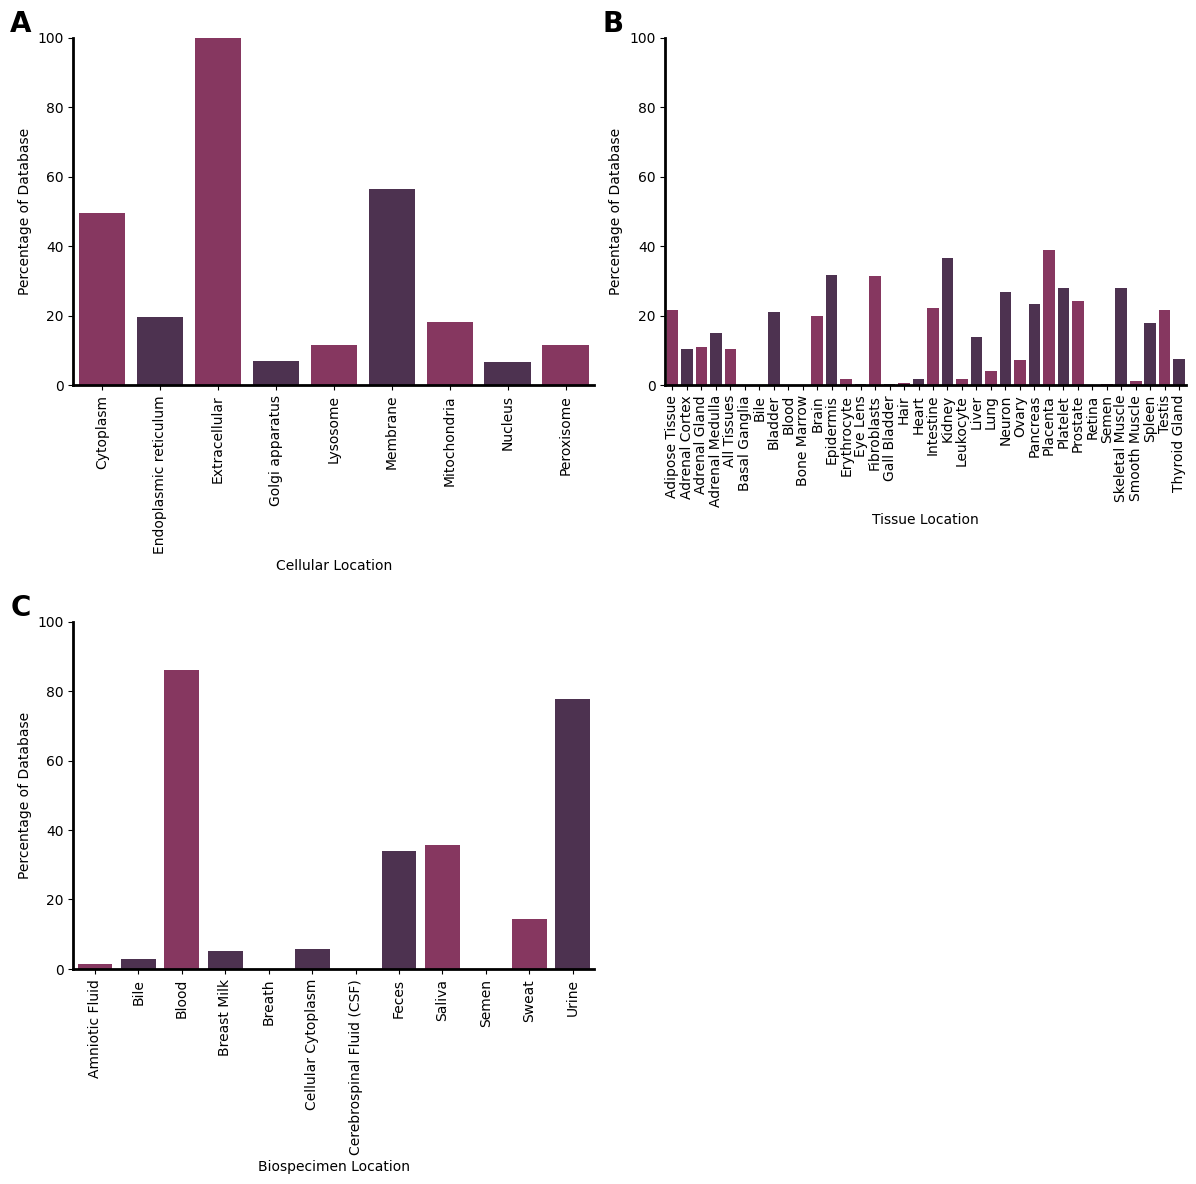

In [9]:
def plot_context(column, xtitle, rotation, ax=None):
    test = MR[column]
    test.dropna(inplace=True)
    test = test.apply(lambda x: x.split(','))
    test = test.explode()
    test = test.str.strip()
    test = test.str.replace('"', '')
    test = test.str.replace("'", '')
    test = test.str.replace('[', '', regex = False)
    test = test.str.replace(']', '', regex = False)
    unique = test.unique()
    #print(unique)

    colors = ["#932a61", "#512D55"] * 20

    percentages = []
    for location in unique:
        test = MR[column]
        count = test.str.contains(location).sum()
        percentages.append(count / len(test) * 100)

    df = pd.DataFrame({'location': unique, 'percentages': percentages})
    df = df.sort_values(by='percentages', ascending=False)
    df['location'] = df['location'].astype('category')

    print(df)
    sns.barplot(data=df, x='location', y='percentages', hue='location', dodge=False, palette=colors, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation)
    ax.set_ylim(0, 100)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)

columns = ['CellLoc', 'TissueLoc', 'BSLoc']
titles = ['Cellular Location', 'Tissue Location', 'Biospecimen Location']
rotation = 90

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()
for i, (column, title) in enumerate(zip(columns, titles)):
    plot_context(column, title, rotation, ax=axes[i])
    axes[i].set_xlabel(title)
    axes[i].set_ylabel('Percentage of Database')
    axes[i].legend('')
    axes[i].get_legend().get_frame().set_linewidth(0.0)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=rotation)

axes[0].text(-0.08, 1.08, 'A', transform=axes[0].transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
axes[1].text(-0.08, 1.08, 'B', transform=axes[1].transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
axes[2].text(-0.08, 1.08, 'C', transform=axes[2].transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
axes[3].axis('off')

plt.tight_layout()
plt.show()

In [6]:
df

NameError: name 'df' is not defined